# Lab 3 - Exploring Anscombe's Quartet

Francis Anscombe was an English statistician who loved graphs and wanted to demonstrate how numerical precision and numerical exploration aren't always as useful as a well-drawn graph.

In [2]:
%matplotlib inline


In [3]:
import pandas
import matplotlib.pyplot
import sklearn.linear_model
import time

In [8]:
train = pandas.read_csv('../../data/sydtrains.csv', thousands=',', index_col='STATION')


In [9]:
train

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Central,CBD,2014,6/05/2014,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101
Town Hall,CBD,2014,7/05/2014,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103
Parramatta,Western,2014,19/11/2014,Yes,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960,4,905
North Sydney,North Shore,2014,19/08/2014,Yes,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610,5,1402
Redfern,CBD,2014,1/05/2014,Yes,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680,6,108
Chatswood,North Shore,2014,19/08/2014,Yes,210,200,5030,8200,4710,4930,9430,6000,2820,2860,22200,22200,7,1407
Bondi Junction,Eastern Suburbs,2014,2/09/2014,Yes,210,210,10150,4350,4370,4600,5240,8330,1910,4380,21880,21880,8,203
Strathfield,Inner West,2014,9/09/2014,Yes,190,190,7900,4050,4980,3950,5540,7230,2100,5280,20710,20710,9,1110


In [11]:
trains2014 = train[train.YEAR ==2014]

In [37]:
people_in_the_am = trains2014.loc[:, ["OUT_0600_0930","OUT_0930_1500"]]
people_in_the_am

,OUT_0600_0930,OUT_0930_1500
STATION,,
Central,42070,30150
Town Hall,43210,23550
Wynyard,39620,11180
Parramatta,13700,7020
North Sydney,18340,5590
Redfern,10690,8170
Chatswood,8200,4930
Bondi Junction,4350,4600
Strathfield,4050,3950


In [24]:
people_in_the_pm =trains2014.IN_1500_1830
people_in_the_pm

STATION
Central                     45370
Town Hall                   43670
Wynyard                     35010
Parramatta                  14960
North Sydney                17760
Redfern                     12510
Chatswood                    9430
Bondi Junction               5240
Strathfield                  5540
Circular Quay                9910
Martin Place                12340
Hurstville                   3840
St Leonards                  8780
Blacktown                    4600
Burwood                      4020
Kings Cross                  4400
Hornsby                      2750
Ashfield                     2500
Kogarah                      3210
Lidcombe                     2550
Auburn                       2700
Museum                       5980
Epping                       1970
Macquarie University         4530
St James                     5630
Rockdale                     1670
Cabramatta                   1750
Bankstown                    2840
Liverpool                    2610
Suther

In [56]:
regressor=sklearn.linear_model.RANSACRegressor(max_trials=10000)

In [57]:
regressor.fit(people_in_the_am, people_in_the_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=10000, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [58]:
predictions_for_pm = regressor.predict(people_in_the_am)

In [59]:
predictions_for_pm.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

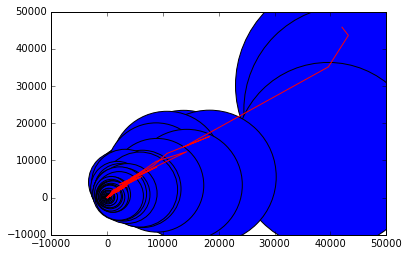

In [71]:
matplotlib.pyplot.scatter(trains2014.OUT_0600_0930, trains2014.OUT_0930_1500, trains2014.IN_1500_1830)
matplotlib.pyplot.plot(trains2014.OUT_0600_0930, predictions_for_pm, color = 'red')

In [64]:
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
regressor.estimator_.coef_

array([ 0.7556584 ,  0.46579695])

In [66]:
regressor.estimator_.intercept_

-20.70894730971861

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116edbb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a35cad0>]], dtype=object)

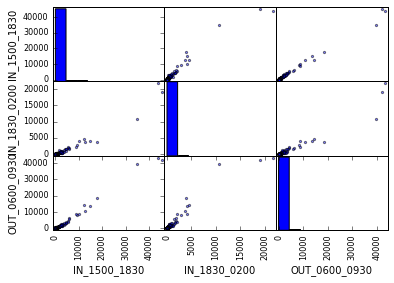

In [20]:
pandas.scatter_matrix(scatter_data_in)

In [ ]:
matplotlib.pyplot.scatter(df.one_x, df.one_y, color='red')

**Anscombe's First Dataset** is a fairly straight-forward linear relationship.

* Which regressors do you think will do a good job with this?

In [ ]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['one_x']], df.one_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['one_x']], df.one_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['one_x']], df.one_y)
matplotlib.pyplot.scatter(df.one_x, df.one_y)
matplotlib.pyplot.plot(df.one_x, clf.predict(df.one_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.one_x, theil.predict(df.one_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.one_x, ransac.predict(df.one_x.reshape(-1,1)), color='yellow', linewidth=1)

In [ ]:
matplotlib.pyplot.scatter(df.two_x, df.two_y, color='green')

**Anscombe's Second Dataset** isn't linear at all.

* What would you expect from a linear regressor?
* (Hard) What could you regress against to expect a good result?

In [ ]:
import sklearn.linear_model
import matplotlib.pyplot
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['two_x']], df.two_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['two_x']], df.two_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['two_x']], df.two_y)
matplotlib.pyplot.scatter(df.two_x, df.two_y)
matplotlib.pyplot.plot(df.two_x, clf.predict(df.two_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.two_x, theil.predict(df.two_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.two_x, ransac.predict(df.two_x.reshape(-1,1)), color='yellow', linewidth=1)

In [ ]:
matplotlib.pyplot.scatter(df.three_x, df.three_y, color='blue')

**Anscombe's Third Dataset** has an outlier.

* Which regressors will cope with this?

In [ ]:
import sklearn.linear_model
import matplotlib.pyplot
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['three_x']], df.three_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['three_x']], df.three_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,["three_x"]], df.three_y)
matplotlib.pyplot.scatter(df.three_x, df.three_y)
matplotlib.pyplot.plot(df.three_x, clf.predict(df.three_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.three_x, theil.predict(df.three_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.three_x, ransac.predict(df.three_x.reshape(-1,1)), color='yellow', linewidth=1)

In [ ]:
matplotlib.pyplot.scatter(df.four_x, df.four_y, color='black')

**Anscombe's Fourth Dataset** shows very little relationship at all between X and Y

* Which regressors will cope with this?
* What actually happens?

(Hint: infinite gradients are considered NaN and ignored)

In [ ]:
import sklearn.linear_model
import matplotlib.pyplot
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['four_x']], df.four_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['four_x']], df.four_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['four_x']], df.four_y)
matplotlib.pyplot.scatter(df.four_x, df.four_y)
matplotlib.pyplot.plot(df.four_x, clf.predict(df.four_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.four_x, theil.predict(df.four_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.four_x, ransac.predict(df.four_x.reshape(-1,1)), color='yellow', linewidth=1)